In [1]:
import xarray as xr
import numpy as np
from geopy import distance
from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import requests
import math

In [2]:
ds =  xr.open_dataset('MyWave_wam4_SPC_20210414T00Z.nc')
ds

<xarray.Dataset> Size: 352MB
Dimensions:                  (direction: 36, freq: 36, x: 924, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 4kB 1 2 3 4 5 6 ... 920 921 922 923 924
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2021-04-13T18:00:00 ....
    latitude                 (y, x) float32 4kB ...
    longitude                (y, x) float32 4kB ...
Data variables:
    SPEC                     (time, y, x, freq, direction) float32 350MB ...
    Pdir                     (time, y, x) float32 270kB ...
    dd                       (time, y, x) float32 270kB ...
    depth                    (y, x) float64 7kB ...
    ff                       (time, y, x) float32 270kB ...
    hs                       (time, y, x) float32 270kB ...
    thq_sea                  (time, y, x) float32 270kB ...
    thq_swell                (time, y, x) float32 270kB ...
    tp                       (time, y, x) float32 270kB ...
    forecast_reference_time  datetime64[ns] 8B ...
Attributes:
    Conventions:                CF-1.0
    institution:                Norwegian Meteorological Institute, met.no
    history:                    Wed Apr 14 02:57:20 2021: ncks -A -v forecast...
    history_of_appended_files:  Wed Apr 14 02:57:20 2021: Appended file W4km_...
    NCO:                        "4.6.3"

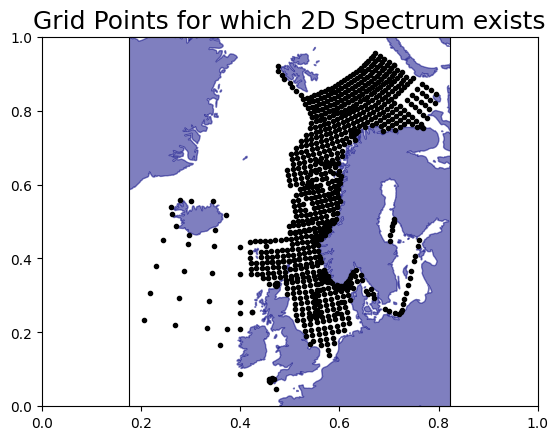

In [3]:
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
# ax.stock_img()
ax.add_feature(cfeature.LAND,color='navy', alpha = 0.5)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.scatter(ds.longitude,ds.latitude,marker='.', color='black', transform=ccrs.PlateCarree())
ds.longitude.values
plt.title('Grid Points for which 2D Spectrum exists',fontsize=18)
plt.show()

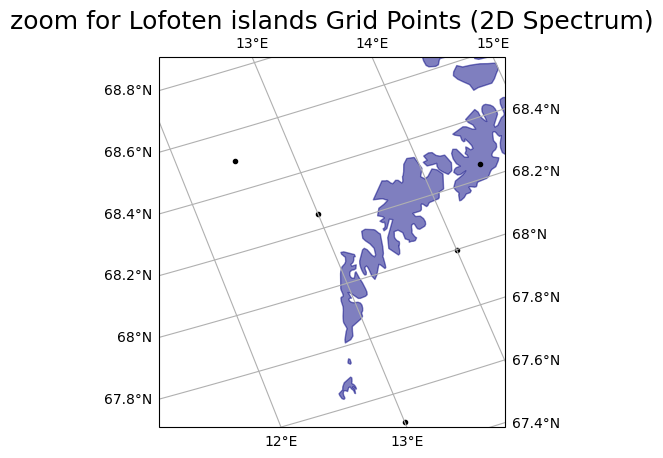

In [4]:
minlon, maxlon, minlat, maxlat = (12, 14, 67.6, 68.7)
proj = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.axes.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
ax.add_feature(cfeature.LAND,color='navy', alpha = 0.5)
ax.gridlines(draw_labels=True)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
res = ax.scatter(ds.longitude,ds.latitude,marker='.', color='black', transform=ccrs.PlateCarree())
#ds.longitude.values
plt.title('zoom for Lofoten islands Grid Points (2D Spectrum)',fontsize=18)
plt.show()

In [5]:
#finding points for withc there is 
latitudes = ds.latitude
longitudes = ds.longitude

extent = [minlon, maxlon, minlat, maxlat ]

lat_indices_x = latitudes.where((latitudes >= extent[2]) & (latitudes <= extent[3]), drop=True).x
lon_indices_x = longitudes.where((longitudes >= extent[0]) & (longitudes <= extent[1]), drop=True).x

lat_within_extent = latitudes.sel(x=lat_indices_x)
lon_within_extent = latitudes.sel(x=lon_indices_x)
intersection = np.intersect1d(lat_within_extent.x.values, lon_within_extent.x.values)
# points for wich specturm exists within extent
intersection

array([471, 476, 485], dtype=int32)

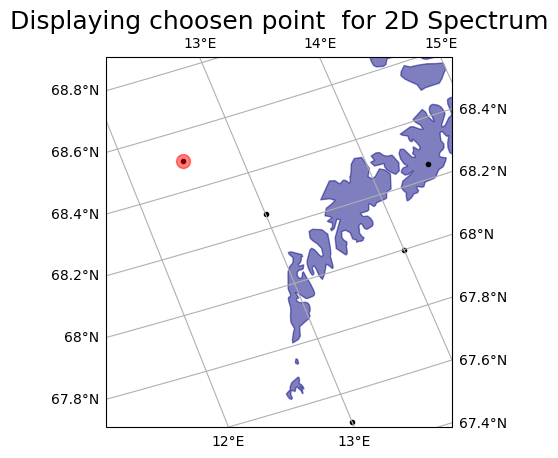

In [6]:
#choosing x and making sure this is the one i think of
spec_x = 485
spec_point_lon = ds.longitude.sel(x=spec_x).values.item()
spec_point_lat = ds.latitude.sel(x=spec_x).values.item()

minlon, maxlon, minlat, maxlat = (12, 14, 67.6, 68.7)
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.axes.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
ax.add_feature(cfeature.LAND,color='navy', alpha = 0.5)
ax.gridlines(draw_labels=True)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.plot(spec_point_lon, spec_point_lat, marker='o', color='red', alpha = 0.5, markersize=10, label="Spectrum point", transform=ccrs.PlateCarree())
res = ax.scatter(ds.longitude,ds.latitude,marker='.', color='black', transform=ccrs.PlateCarree())
#ds.longitude.values
plt.title('Displaying choosen point  for 2D Spectrum',fontsize=18)
plt.show()

In [7]:
ds.isel(time = 0, x = spec_x)['SPEC']

<xarray.DataArray 'SPEC' (y: 1, freq: 36, direction: 36)> Size: 5kB
[1296 values with dtype=float32]
Coordinates:
  * direction  (direction) float32 144B 5.0 15.0 25.0 35.0 ... 335.0 345.0 355.0
  * freq       (freq) float32 144B 0.03452 0.03798 0.04177 ... 0.882 0.9702
    x          int32 4B 486
  * y          (y) int32 4B 1
    time       datetime64[ns] 8B 2021-04-13T18:00:00
    latitude   (y) float32 4B 68.5
    longitude  (y) float32 4B 38.5
Attributes:
    long_name:      2-D spectrum of total sea
    standard_name:  2D_SPECTRUM
    units:          m**2 s

In [8]:
ds.freq

<xarray.DataArray 'freq' (freq: 36)> Size: 144B
array([0.034523, 0.037975, 0.041773, 0.04595 , 0.050545, 0.0556  , 0.06116 ,
       0.067276, 0.074003, 0.081403, 0.089544, 0.098498, 0.108348, 0.119183,
       0.131101, 0.144211, 0.158632, 0.174496, 0.191945, 0.21114 , 0.232254,
       0.255479, 0.281027, 0.30913 , 0.340043, 0.374047, 0.411451, 0.452597,
       0.497856, 0.547642, 0.602406, 0.662647, 0.728911, 0.801803, 0.881983,
       0.970181], dtype=float32)
Coordinates:
  * freq     (freq) float32 144B 0.03452 0.03798 0.04177 ... 0.8018 0.882 0.9702
Attributes:
    units:    1/s

In [9]:
ds.freq.values

array([0.034523  , 0.0379753 , 0.04177283, 0.04595011, 0.05054513,
       0.05559964, 0.06115961, 0.06727557, 0.07400313, 0.08140344,
       0.08954379, 0.09849817, 0.10834799, 0.11918279, 0.13110107,
       0.14421119, 0.15863231, 0.17449555, 0.1919451 , 0.21113962,
       0.23225358, 0.25547895, 0.28102684, 0.30912954, 0.3400425 ,
       0.37404677, 0.41145146, 0.4525966 , 0.4978563 , 0.54764193,
       0.60240614, 0.6626468 , 0.72891146, 0.80180264, 0.8819829 ,
       0.9701812 ], dtype=float32)

In [10]:
ds.direction 

<xarray.DataArray 'direction' (direction: 36)> Size: 144B
array([  5.      ,  15.      ,  24.999998,  34.999996,  45.      ,  54.999996,
        65.      ,  74.99999 ,  84.99999 ,  95.      , 104.99999 , 115.      ,
       124.99999 , 135.      , 144.99998 , 154.99998 , 164.99998 , 174.99998 ,
       185.      , 194.99998 , 204.99998 , 214.99998 , 224.99998 , 235.      ,
       244.99998 , 254.99998 , 265.      , 274.99997 , 284.99997 , 294.99997 ,
       304.99997 , 314.99997 , 324.99997 , 334.99997 , 344.99997 , 354.99997 ],
      dtype=float32)
Coordinates:
  * direction  (direction) float32 144B 5.0 15.0 25.0 35.0 ... 335.0 345.0 355.0
Attributes:
    units:    degree

In [11]:
freq_vals = ds.isel(time = 1,  x = spec_x, y = 0)['SPEC'].values
freq_idx = np.arange(1, freq_vals.shape[0], 1)
periods = 1/ ds.freq.values
freq_mean_vals = np.mean(freq_vals, axis=1)
deg_mean_vals = np.mean(freq_vals, axis=0)

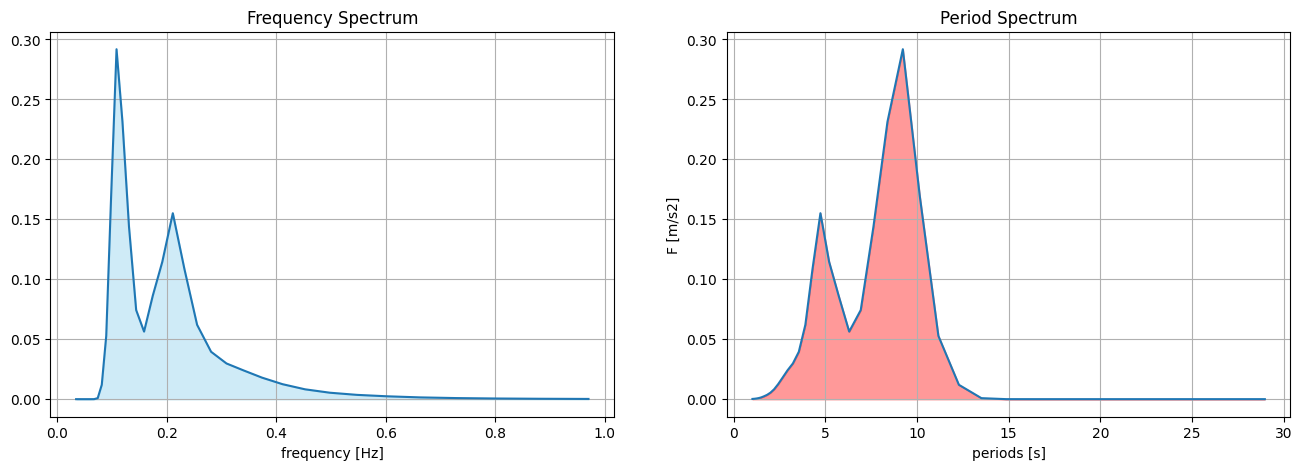

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5)) 
ax1.plot(ds.freq.values, freq_mean_vals)
ax1.fill_between(ds.freq.values, freq_mean_vals, color="skyblue", alpha=0.4)
ax1.set_title("Frequency Spectrum")
ax1.set_xlabel("frequency [Hz]")
ax1.grid(True)

ax2.set_ylabel("F [m/s2]")
ax2.set_title("Period Spectrum")
ax2.set_xlabel("periods [s]")
ax2.plot(periods, freq_mean_vals)
ax2.fill_between(periods, freq_mean_vals, color="red", alpha=0.4)
ax2.grid(True)


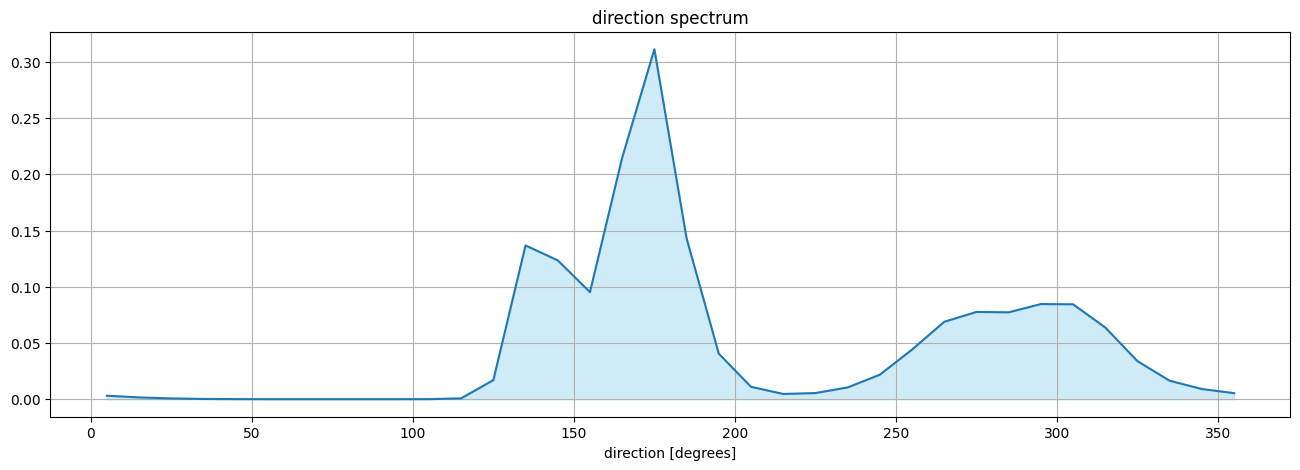

In [13]:
fig, (ax) = plt.subplots(1, 1, figsize=(16, 5)) 
deg_mean_vals = np.mean(freq_vals, axis=0)
ax.plot(ds.direction.values, deg_mean_vals)
ax.fill_between(ds.direction.values, deg_mean_vals, color="skyblue", alpha=0.4)
ax.set_title("direction spectrum")
ax.set_xlabel("direction [degrees]")
ax.grid(True)

In [14]:
# peak direction
spec = ds.isel(time = 1,  x = spec_x, y = 0)['SPEC'].values
max_idx_flat = np.argmax(spec)
(freq_max_idx, dir_max_idx) = np.unravel_index(max_idx_flat, spec.shape)
peak_dir = ds.direction.values[dir_max_idx]
dir_max_idx, peak_dir, ds.isel(time = 1,  x = spec_x, y = 0)['Pdir'].values.item(0)

(17, 174.99998, 174.12777709960938)

In [15]:
ds.direction.values

array([  4.9999995,  15.       ,  24.999998 ,  34.999996 ,  45.       ,
        54.999996 ,  65.       ,  74.99999  ,  84.99999  ,  95.       ,
       104.99999  , 115.       , 124.99999  , 135.       , 144.99998  ,
       154.99998  , 164.99998  , 174.99998  , 185.       , 194.99998  ,
       204.99998  , 214.99998  , 224.99998  , 235.       , 244.99998  ,
       254.99998  , 265.       , 274.99997  , 284.99997  , 294.99997  ,
       304.99997  , 314.99997  , 324.99997  , 334.99997  , 344.99997  ,
       354.99997  ], dtype=float32)

In [16]:
# peak frequency
peak_freq = ds.freq.values[freq_max_idx]
peak_freq, 1/peak_freq, ds.isel(time = 1,  x = spec_x, y = 0)['tp'].values.item(0)

(0.10834799, 9.229520580109462, 9.229520797729492)

In [21]:
spectrum = ds.isel(time = 1,  x = spec_x, y = 0)['SPEC'].values
directions =ds.direction.values
frequencies =ds.freq.values
dtheta = np.diff(directions).mean()  # Direction spacing

m_0_directional = np.trapz(spectrum, directions, axis=0)
# Now integrate m_0 over frequencies
m_0 = np.trapz(m_0_directional, frequencies)
m_0 = (m_0_directional *frequencies).sum()
#m_0 = m_0_directional * frequencies
H_s = 4 * np.sqrt(m_0)
H_s



#df = frequencies[1] - frequencies[0]    # Frequency spacing

# Now integrate m_0 over frequencies
#m_0 = np.trapz(m_0_directional, frequencies)

# Calculate significant wave height
#H_s = 4 * np.sqrt(m_0)


53.534671783447266

In [22]:
integral = np.trapz(freq_mean_vals, ds.freq.values)
hs = 4 * np.sqrt(integral)
integral, hs, ds.isel(time = 1,  x = spec_x, y = 0)['hs'].values.item(0)

(0.027115975, 0.6586771607398987, 1.674267292022705)